## Visium HD Human Colorectal Cancer (FFPE)

* url: https://www.10xgenomics.com/datasets/visium-hd-cytassist-gene-expression-libraries-of-human-crc-v4

In [ ]:
import scanpy as sc
import trackcell as tcl
import numpy as np
import squidpy as sq
import matplotlib.pyplot as plt

print(tcl.__version__)

In [2]:
def subset_data(Adata, xlim=(54500, 56000), ylim=(15000, 16000)):
    # Define region of interest
    x_min, x_max = xlim[0], xlim[1]
    y_min, y_max = ylim[0], ylim[1]
    
    # Create mask for spatial coordinates
    spatial_coords = adata.obsm['spatial']
    mask = ((spatial_coords[:, 0] >= x_min) & (spatial_coords[:, 0] <= x_max) &
            (spatial_coords[:, 1] >= y_min) & (spatial_coords[:, 1] <= y_max))
    
    # Create subset
    bdata = adata[mask].copy()
    bdata.obs_names_make_unique()
    bdata.var_names_make_unique()
    # QC
    # mitochondrial genes, "MT-" for human, "Mt-" for mouse
    bdata.var["mt"] = bdata.var_names.str.startswith("MT-")
    # ribosomal genes
    bdata.var["ribo"] = bdata.var_names.str.startswith(("RPS", "RPL"))
    # hemoglobin genes
    bdata.var["hb"] = bdata.var_names.str.contains("^HB[^(P)]")
    sc.pp.calculate_qc_metrics(bdata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True)
    bdata.layers["counts"] = bdata.X.copy()

    # Normalizing to median total counts
    sc.pp.normalize_total(bdata)
    # Logarithmize the data
    sc.pp.log1p(bdata)
    
    return bdata


In [ ]:
datapath = 'outs/segmented_outputs'
adata = tcl.io.read_hd_cellseg(
    datapath=datapath,
    sample="CC"
)

### scanpy vis

In [1]:
sc.pl.spatial(adata, color="classification", 
              size=3, linewidth=0,
              legend_fontsize=12, frameon=True)

NameError: name 'sc' is not defined

### squidpy vis

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7, 6))

sq.pl.spatial_scatter(
            adata, shape=None, color=['classification'], 
            #na_color='#F5F5F5',
            size=3, linewidth=0, 
            library_id="CC",
            legend_na=True, 
            ax=ax
        )

### subset data select ROI to vis

In [ ]:
bdata = subset_data(adata)

/tmp/ipykernel_3659314/3159057110.py:7: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(bdata, color="classification",


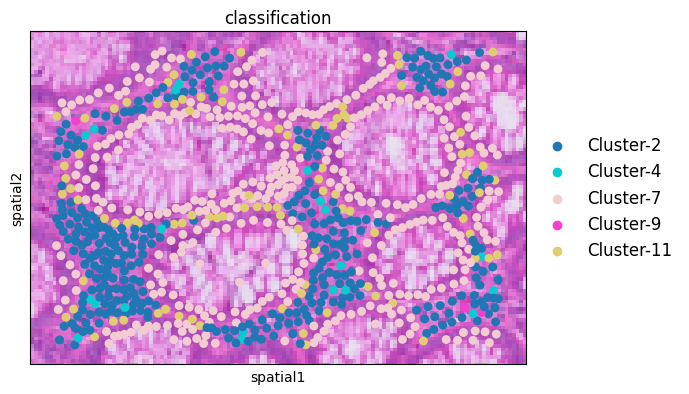

In [7]:
paletes= {'Cluster-2': '#1F77B4',
          'Cluster-4': '#07CCD2', 
          'Cluster-7': '#F3CCD2', 
          'Cluster-9': '#F340D2', 
          'Cluster-11': '#E0CC71'}

sc.pl.spatial(bdata, color="classification", 
              palette=paletes, frameon=True,
              size=3, spot_size=10,
              legend_fontsize=12)

/tmp/ipykernel_3659314/462138400.py:3: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(bdata, color=['COL3A1'], size=3, ax=ax,


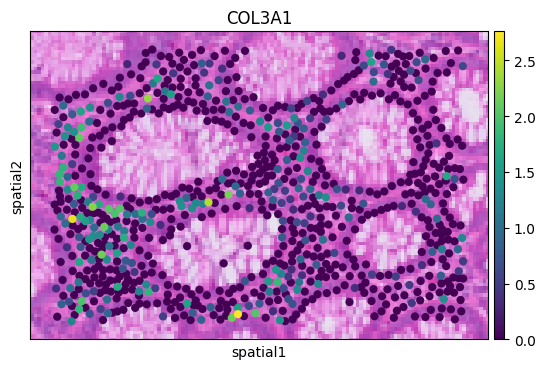

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))

sc.pl.spatial(bdata, color=['COL3A1'], size=3, ax=ax, 
              legend_fontsize=12, spot_size=10, frameon=True)

### Visualization spatial cell

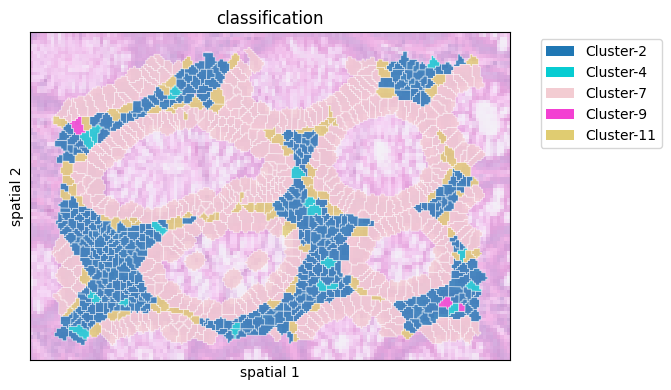

In [14]:
paletes2 = ['#1F77B4','#07CCD2','#F3CCD2','#F340D2','#E0CC71', 'y']

_ = tcl.pl.spatial_cell(
    bdata,
    color="classification",
    palette=paletes2,
    edges_color='white',
    edges_width=0.4,
    figsize=(7, 4)
)

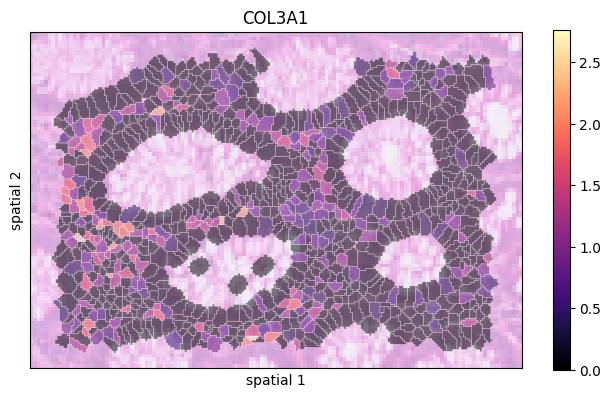

In [17]:
import trackcell as tcl

_ = tcl.pl.spatial_cell(
    bdata,
    color="COL3A1",
    palete=paletes,
    alpha=0.5,
    edges_color='white',
    edges_width=0.4, 
    cmap='magma',
    figsize=(7, 4)
)

### custom cmap

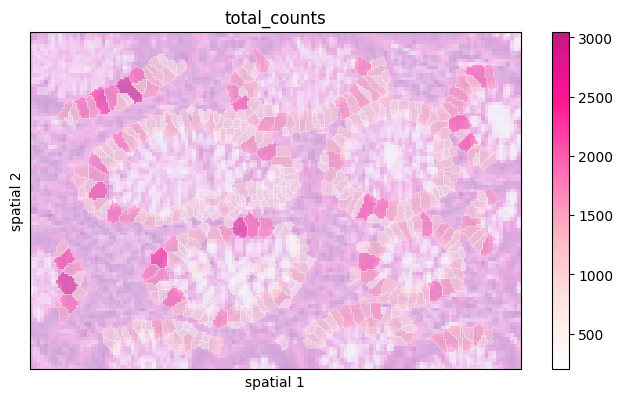

In [15]:
import matplotlib.colors as mcolors
pink_colors = ["#FFFFFF", "#FFE4E1", "#FFB6C1", "#FF69B4", "#FF1493", "#C71585"]
pink_cmap = mcolors.LinearSegmentedColormap.from_list('custom_pink', pink_colors, N=256)

_ = tcl.pl.spatial_cell(
    bdata,
    color="total_counts",
    #palete=paletes,
    alpha=0.5,
    groupby="classification",
    groups=['Cluster-7'],  # Only plot cells of interest
    edges_color='white',
    edges_width=0.4,
    cmap=pink_cmap,
    figsize=(7, 4)
)

## label distance

In [21]:
tcl.tl.hd_labeldist(
    adata,
    groupby="classification", 
    label="Cluster-7", 
    inplace=True 
)

/tmp/ipykernel_3659314/3403037280.py:1: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata, color="Cluster-7_dist",


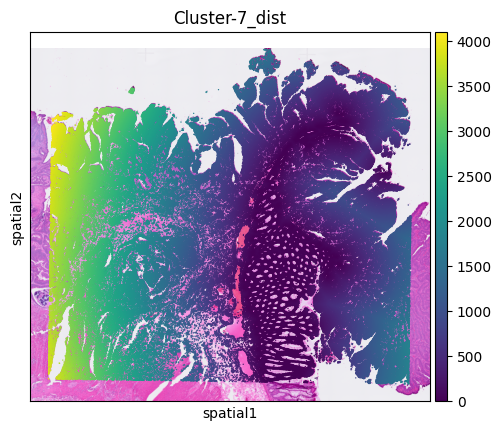

In [22]:
sc.pl.spatial(adata, color="Cluster-7_dist", 
              size=3, linewidth=0,
              legend_fontsize=12, frameon=True)

/annogene/data2/share/software/SCV/SC_tools/Miniforge3/envs/st/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_3659314/3944486563.py:4: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata, color="log_Cluster-7_dist",


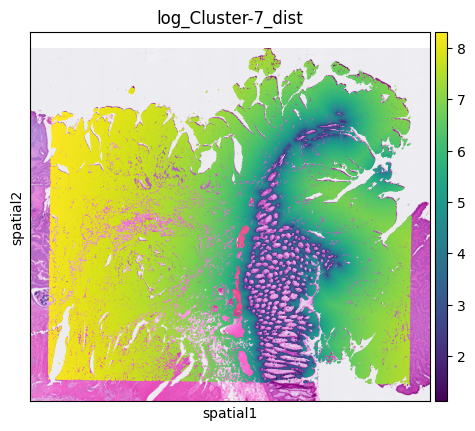

In [23]:
import numpy as np
adata.obs['log_Cluster-7_dist'] = np.log(adata.obs['Cluster-7_dist'])

sc.pl.spatial(adata, color="log_Cluster-7_dist", 
              size=3, linewidth=0,
              legend_fontsize=12, frameon=True)